#Importandos dados e lendo


In [3]:
import pandas as pd
dados = pd.read_csv('/content/marketing_investimento.csv')
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


In [4]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


# Analise de variaveis categoricas

In [5]:
import plotly.express as px


px.histogram(dados, x='aderencia_investimento', text_auto=True)

In [7]:
import plotly.express as px


px.histogram(dados, x='estado_civil', text_auto=True, color='aderencia_investimento', barmode='group')

In [8]:
import plotly.express as px


px.histogram(dados, x='escolaridade', text_auto=True, color='aderencia_investimento', barmode='group')

In [10]:
import plotly.express as px


px.histogram(dados, x='inadimplencia', text_auto=True, color='aderencia_investimento', barmode='group')

In [11]:
import plotly.express as px


px.histogram(dados, x='fez_emprestimo', text_auto=True, color='aderencia_investimento', barmode='group')

# Variaveis Numerica


In [13]:
px.box(dados, x='idade', color='aderencia_investimento')

In [14]:
px.box(dados, x='saldo', color='aderencia_investimento')

In [15]:
px.box(dados, x='tempo_ult_contato', color='aderencia_investimento')

# Removendo coluna

In [58]:
x= dados.drop('aderencia_investimento', axis=1)
y= dados['aderencia_investimento']

#Transformando variaveis explicativas  para valores numericos


##hot encoding. Essa ação transforma cada uma das classes das variáveis categóricas em novas colunas, utilizando o valor 0 para representar a ausência da característica e 1 para a presença da característica na amostra da base de dados.

In [59]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
     [
         'estado_civil',
         'escolaridade',
         'inadimplencia',
         'fez_emprestimo'
     ]), remainder='passthrough',
         sparse_threshold=0)


colunas = x.columns

x = one_hot.fit_transform(x)
one_hot.get_feature_names_out(colunas)



array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [101]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))


,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


#Transformando a variavel alvo

LabelEncoder  é o método indicado para fazer a transformação da variável alvo para valores numéricos em problemas de classificação de dados.

In [61]:
from sklearn.preprocessing import LabelEncoder


In [62]:
label_ecoder = LabelEncoder()


In [67]:
y = label_ecoder.fit_transform(y)


In [66]:
y


array([1, 1, 0, ..., 1, 1, 1])

#Separar os daos para teste'

 O conjunto de treinamento é utilizado para que o modelo compreenda padrões e relações nos dados para que ele possa criar uma regra para fazer predições. O conjunto de teste, por sua vez, é reservado para avaliar o desempenho do modelo em dados que não foram utilizados no treinamento, simulando a capacidade do modelo de generalizar para novos dados.


* Overfitting (Sobreajuste):

O overfitting ocorre quando um modelo se ajusta demais aos dados de treinamento. Isso indica que o modelo capturou não só o padrão dos dados, mas também ruídos e variações aleatórias que estão presentes nos dados usados para treinamento. Como resultado disso, o modelo tem um resultado muito bom ao ser avaliado com os dados de treinamento, porém seu desempenho nos dados de teste ou em dados novos cai consideravelmente.

Características do overfitting:

- Erro muito baixo nas predições em dados de treinamento;
- Erro muito alto nas predições em dados de teste;
- Modelo muito complexo que tenta memorizar os dados de treinamento ao invés de aprender '


* Underfitting (Subajuste):
O underfitting ocorre quando um modelo é muito simples e não consegue capturar o padrão presente nos dados. Isso indica que o modelo não foi capaz de aprender os relacionamentos existentes nos dados de treinamento e acaba tendo um desempenho ruim tanto em dados de treinamento quanto de teste.

Características do underfitting:

- Erro muito alto nas predições em dados de treinamento;
- Erro muito alto nas predições em dados de teste;
- Modelo muito simples que não consegue representar bem os dados.

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify=y, random_state=5)

# Modelo de base

 Este modelo faz a classificação a partir da categoria da variável alvo que tem maior frequência, prevendo todos os valores com o mesmo resultado.
 - ele serve como um modelo de comparação para modelos mais complexos, servindo de referência para avaliar o desempenho das classificações.

In [70]:
from sklearn.dummy import DummyClassifier

In [71]:
dummy= DummyClassifier()
dummy.fit(x_treino, y_treino)


dummy.score(x_teste, y_teste)

0.6025236593059937

# Arvore de desicao

arvore compara se um valor é maior ou menor a partir dos valores de uma coluna do dataframe, e separa os dados com base no resultado dessa comparação. Portanto, aqueles dados que tiverem um valor maior que o valor estipulado pela árvore serão separados em um grupo, e aqueles que tiverem um valor menor serão separados em um grupo diferente.

No entanto, a escolha de qual coluna e o valor de comparação serão controlados para tomar uma boa decisão. Isso é controlado pelo índice de Gini, um cálculo realizado para determinar a melhor separação possível, ou seja, aquela que vai dividir a maior quantidade possível de dados das duas classes da variável alvo. Portanto, são testadas várias comparações de valores e colunas, e o melhor índice de Gini determina a escolha feita pela árvore final.

A árvore não toma apenas uma decisão. Conforme são tomadas as decisões, são feitas novas subdivisões, escolhendo novos índices de Gini e assim por diante. Uma vez separados todos os dados, a árvore aprende o padrão dos dados e cria uma regra que será utilizada na classificação de novos dados.

In [76]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



In [84]:
arvore = DecisionTreeClassifier(max_depth=3, random_state =5)
arvore.fit(x_treino, y_treino)


DecisionTreeClassifier(max_depth=3, random_state=5)

In [90]:
arvore.predict(x_teste)


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [85]:
arvore.score(x_teste, y_teste)

0.7160883280757098

In [86]:
arvore.score(x_treino, y_treino)

0.7613038906414301

In [ ]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']



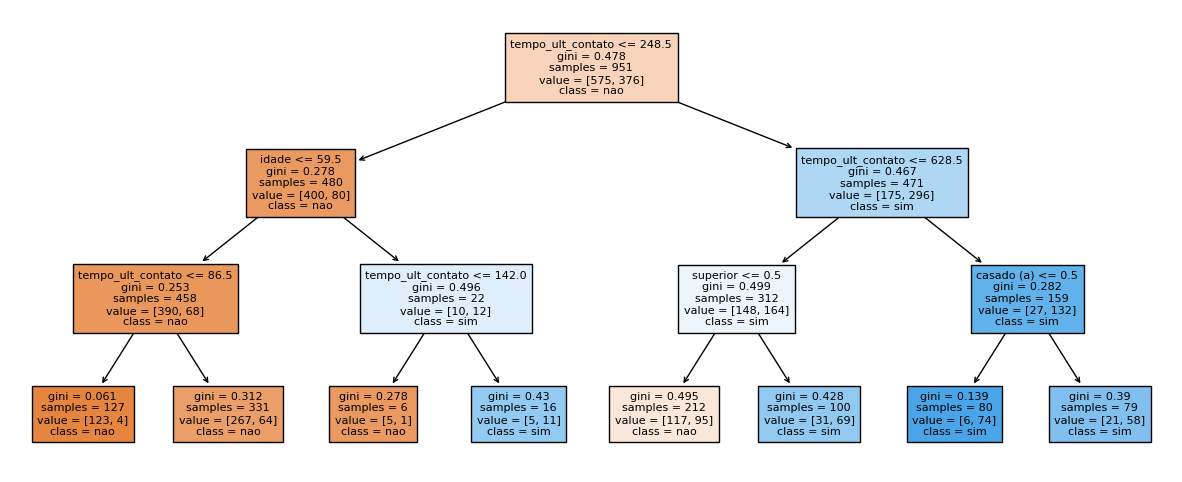

In [88]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 8, feature_names = nome_colunas);


# algoritmo KNN

*  KNN (K-Nearest Neighbors, em inglês). Este algoritmo, ao invés de tomar as decisões com base na comparação dos valores das colunas, como é na árvore de decisão, realizará um cálculo de distância entre os elementos da base de dados. Como exemplo, ele vai pegar o primeiro registro da base de dados, calcular a distância desse elemento para o segundo elemento da base de dados e assim por diante.

* Ele vai fazer todos os cálculos de distância, de um elemento até todos os outros e em seguida verificar quais foram os elementos mais próximos para cada um dos registros.

##Normalização de dados

A normalização garante que todas as características tenham o mesmo impacto no modelo, tornando as previsões mais justas e equilibradas.

In [94]:
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()

x_treino_normalizado = normalizacao.fit_transform(x_treino)


In [95]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


## KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [97]:
x_teste_normalizado = normalizacao.transform(x_teste)

In [98]:
knn.score(x_teste_normalizado, y_teste)

0.6876971608832808

#Comparar modelos

In [107]:

print (f'Dummy: {dummy.score(x_treino, y_treino)}')
print(f'Arvore de decisao: {arvore.score(x_teste, y_teste)}')
print(f'KNN: {knn.score(x_teste_normalizado, y_teste)}')

Dummy: 0.6046267087276551
Arvore de decisao: 0.7160883280757098
KNN: 0.6876971608832808


In [108]:
import pickle

In [105]:
with open( 'modelo_onehotenc.pkl', 'wb') as arquivo:
  pickle.dump(one_hot, arquivo)

In [109]:
with open('modelo_arvore.pkl', 'wb') as arquivo:
  pickle.dump(arvore, arquivo)

In [110]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [112]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}


In [113]:
#Este novo dado será transformado em um dataframe:
novo_dado = pd.DataFrame(novo_dado)
novo_dado


,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [115]:
modelo_one_hot= pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arvore= pd.read_pickle('/content/modelo_arvore.pkl')

fazer a transformação desses novos dados e, em seguida, passamos essa transição para o modelo de árvore para realizar a previsão. Neste sentido, novo_dado será igual a modelo_onehot.transform(novo_dado). Dessa forma, primeiro faremos a transformação dos dados. E na mesma célula, vamos utilizar o modelo de árvore de decisão com modelo_arvore.predict(novo_dado).

In [116]:
novo_dado= modelo_one_hot.transform(novo_dado)

In [117]:
modelo_arvore.predict(novo_dado)

array([1])

Assim, ao executar essa célula, veremos o resultado do modelo de árvore, que retorna um array com o valor 1. Isso indica que esse novo dado que utilizamos, esse cliente aderirá à campanha de marketing, ele investirá. Com base em nosso modelo de árvore de decisão.